In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
# A function to create a dataset.
from sklearn.datasets import make_blobs 

# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline 

# Set a seed so that the results are consistent.
np.random.seed(3)

[]

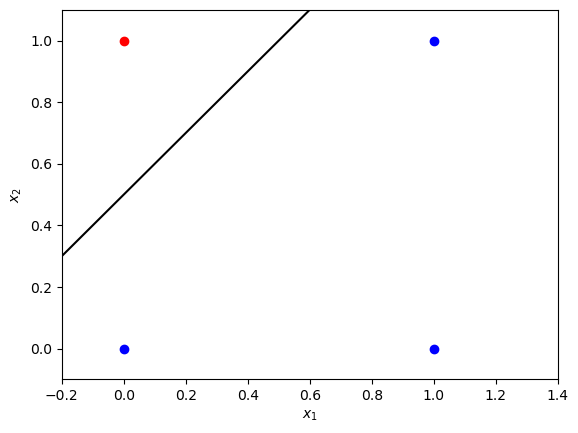

In [3]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
x_line = np.arange(xmin, xmax, 0.1)
# Data points (observations) from two classes.
ax.scatter(0, 0, color="b")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="b")
ax.scatter(1, 1, color="b")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
# One of the lines which can be used as a decision boundary to separate two classes.
ax.plot(x_line, x_line + 0.5, color="black")
plt.plot()

In [4]:
m = 30

X = np.random.randint(0, 2, (2, m))
Y = np.logical_and(X[0] == 0, X[1] == 1).astype(int).reshape((1, m))

print("Training dataset X containing (x1, x2) coordinates in the columns:")
print(X)
print("Training dataset Y containing labels of two classes (0: blue, 1: red)")
print(Y)

print("The shape of X is: " + str(X.shape))
print("The shape of Y is: " + str(Y.shape))
print("I have m = %d training examples!" % (X.shape[1]))

Training dataset X containing (x1, x2) coordinates in the columns:
[[0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]
 [0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0]]
Training dataset Y containing labels of two classes (0: blue, 1: red)
[[0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0]]
The shape of X is: (2, 30)
The shape of Y is: (1, 30)
I have m = 30 training examples!


In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


print("sigmoid(-2) = " + str(sigmoid(-2)))
print("sigmoid(0) = " + str(sigmoid(0)))
print("sigmoid(3.5) = " + str(sigmoid(3.5)))

sigmoid(-2) = 0.11920292202211755
sigmoid(0) = 0.5
sigmoid(3.5) = 0.9706877692486436


In [6]:
print(sigmoid(np.array([-2, 0, 3.5])))

[0.11920292 0.5        0.97068777]


In [7]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)

    Returns:
    n_x -- the size of the input layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0]
    n_y = Y.shape[0]

    return (n_x, n_y)


(n_x, n_y) = layer_sizes(X, Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 2
The size of the output layer is: n_y = 1


In [8]:
def initialize_parameters(n_x, n_y):
    """
    Returns:
    params -- python dictionary containing your parameters:
                    W -- weight matrix of shape (n_y, n_x)
                    b -- bias value set as a vector of shape (n_y, 1)
    """

    W = np.random.randn(n_y, n_x) * 0.01
    b = np.zeros((n_y, 1))

    parameters = {"W": W, "b": b}

    return parameters


parameters = initialize_parameters(n_x, n_y)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[-0.00768836 -0.00230031]]
b = [[0.]]


In [9]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)

    Returns:
    A -- The output
    """
    W = parameters["W"]
    b = parameters["b"]

    # Forward Propagation to calculate Z.
    Z = np.matmul(W, X) + b
    A = sigmoid(Z)

    return A


A = forward_propagation(X, parameters)

print("Output vector A:", A)

Output vector A: [[0.5        0.49942492 0.49807792 0.49750285 0.49942492 0.5
  0.49942492 0.49807792 0.49807792 0.49750285 0.49942492 0.49807792
  0.49807792 0.49750285 0.5        0.49750285 0.49807792 0.49942492
  0.49942492 0.49942492 0.49942492 0.49807792 0.49750285 0.5
  0.5        0.49942492 0.49750285 0.49942492 0.5        0.5       ]]


In [10]:
def compute_cost(A, Y):
    """
    Computes the log loss cost function

    Arguments:
    A -- The output of the neural network of shape (n_y, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)

    Returns:
    cost -- log loss

    """
    # Number of examples.
    m = Y.shape[1]

    # Compute the cost function.
    logprobs = -np.multiply(np.log(A), Y) - np.multiply(np.log(1 - A), 1 - Y)
    cost = 1 / m * np.sum(logprobs)

    return cost


print("cost = " + str(compute_cost(A, Y)))

cost = 0.6916391611507908


In [11]:
def backward_propagation(A, X, Y):
    """
    Implements the backward propagation, calculating gradients

    Arguments:
    A -- the output of the neural network of shape (n_y, number of examples)
    X -- input data of shape (n_x, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)

    Returns:
    grads -- python dictionary containing gradients with respect to different parameters
    """
    m = X.shape[1]

    # Backward propagation: calculate partial derivatives denoted as dW, db for simplicity.
    dZ = A - Y
    dW = 1 / m * np.dot(dZ, X.T)
    db = 1 / m * np.sum(dZ, axis=1, keepdims=True)

    grads = {"dW": dW, "db": db}

    return grads


grads = backward_propagation(A, X, Y)

print("dW = " + str(grads["dW"]))
print("db = " + str(grads["db"]))

dW = [[ 0.21571875 -0.06735779]]
db = [[0.16552706]]


In [12]:
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule

    Arguments:
    parameters -- python dictionary containing parameters
    grads -- python dictionary containing gradients
    learning_rate -- learning rate parameter for gradient descent

    Returns:
    parameters -- python dictionary containing updated parameters
    """
    # Retrieve each parameter from the dictionary "parameters".
    W = parameters["W"]
    b = parameters["b"]

    # Retrieve each gradient from the dictionary "grads".
    dW = grads["dW"]
    db = grads["db"]

    # Update rule for each parameter.
    W = W - learning_rate * dW
    b = b - learning_rate * db

    parameters = {"W": W, "b": b}

    return parameters


parameters_updated = update_parameters(parameters, grads)

print("W updated = " + str(parameters_updated["W"]))
print("b updated = " + str(parameters_updated["b"]))

W updated = [[-0.26655087  0.07852904]]
b updated = [[-0.19863247]]


In [13]:
def nn_model(X, Y, num_iterations=10, learning_rate=1.2, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (n_x, number of examples)
    Y -- labels of shape (n_y, number of examples)
    num_iterations -- number of iterations in the loop
    learning_rate -- learning rate parameter for gradient descent
    print_cost -- if True, print the cost every iteration

    Returns:
    parameters -- parameters learnt by the model. They can then be used to make predictions.
    """

    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[1]

    parameters = initialize_parameters(n_x, n_y)

    # Loop
    for i in range(0, num_iterations):
        # Forward propagation. Inputs: "X, parameters". Outputs: "A".
        A = forward_propagation(X, parameters)

        # Cost function. Inputs: "A, Y". Outputs: "cost".
        cost = compute_cost(A, Y)

        # Backpropagation. Inputs: "A, X, Y". Outputs: "grads".
        grads = backward_propagation(A, X, Y)

        # Gradient descent parameter update. Inputs: "parameters, grads, learning_rate". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the cost every iteration.
        if print_cost:
            print("Cost after iteration %i: %f" % (i, cost))

    return parameters

In [14]:
parameters = nn_model(X, Y, num_iterations=50, learning_rate=1.2, print_cost=True)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

Cost after iteration 0: 0.693480
Cost after iteration 1: 0.608586
Cost after iteration 2: 0.554475
Cost after iteration 3: 0.513124
Cost after iteration 4: 0.478828
Cost after iteration 5: 0.449395
Cost after iteration 6: 0.423719
Cost after iteration 7: 0.401089
Cost after iteration 8: 0.380986
Cost after iteration 9: 0.363002
Cost after iteration 10: 0.346813
Cost after iteration 11: 0.332152
Cost after iteration 12: 0.318805
Cost after iteration 13: 0.306594
Cost after iteration 14: 0.295369
Cost after iteration 15: 0.285010
Cost after iteration 16: 0.275412
Cost after iteration 17: 0.266489
Cost after iteration 18: 0.258167
Cost after iteration 19: 0.250382
Cost after iteration 20: 0.243080
Cost after iteration 21: 0.236215
Cost after iteration 22: 0.229745
Cost after iteration 23: 0.223634
Cost after iteration 24: 0.217853
Cost after iteration 25: 0.212372
Cost after iteration 26: 0.207168
Cost after iteration 27: 0.202219
Cost after iteration 28: 0.197505
Cost after iteration 29:

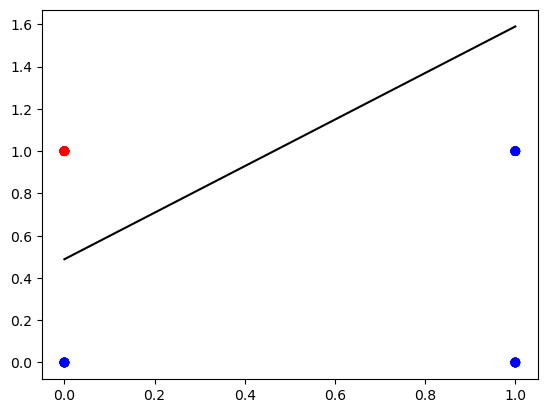

In [15]:
def plot_decision_boundary(X, Y, parameters):
    W = parameters["W"]
    b = parameters["b"]

    fig, ax = plt.subplots()
    plt.scatter(X[0, :], X[1, :], c=Y, cmap=colors.ListedColormap(["blue", "red"]))

    x_line = np.arange(np.min(X[0, :]), np.max(X[0, :]) * 1.1, 0.1)
    ax.plot(x_line, -W[0, 0] / W[0, 1] * x_line + -b[0, 0] / W[0, 1], color="black")
    plt.plot()
    plt.show()


plot_decision_boundary(X, Y, parameters)

In [16]:
def predict(X, parameters):
    """
    Using the learned parameters, predicts a class for each example in X

    Arguments:
    parameters -- python dictionary containing your parameters
    X -- input data of size (n_x, m)

    Returns
    predictions -- vector of predictions of our model (blue: False / red: True)
    """

    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A = forward_propagation(X, parameters)
    predictions = A > 0.5

    return predictions


X_pred = np.array([[1, 1, 0, 0], [0, 1, 0, 1]])
Y_pred = predict(X_pred, parameters)

print(f"Coordinates (in the columns):\n{X_pred}")
print(f"Predictions:\n{Y_pred}")

Coordinates (in the columns):
[[1 1 0 0]
 [0 1 0 1]]
Predictions:
[[False False False  True]]


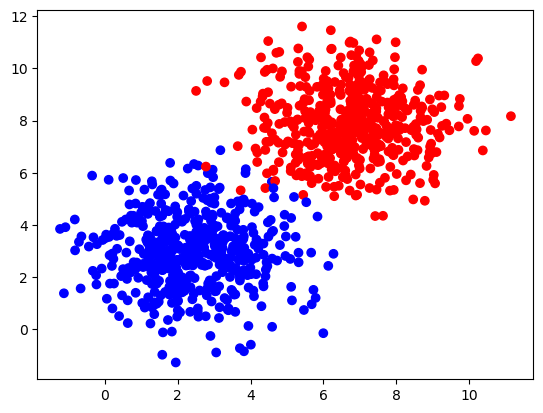

In [23]:
# Dataset
n_samples = 1000
samples, labels = make_blobs(
    n_samples=n_samples, centers=([2.5, 3], [6.7, 7.9]), cluster_std=1.4, random_state=0
)

X_larger = np.transpose(samples)
Y_larger = labels.reshape((1, n_samples))

plt.scatter(
    X_larger[0, :],
    X_larger[1, :],
    c=Y_larger,
    cmap=colors.ListedColormap(["blue", "red"]),
)

In [24]:
parameters_larger = nn_model(
    X_larger, Y_larger, num_iterations=100, learning_rate=1.2, print_cost=False
)
print("W = " + str(parameters_larger["W"]))
print("b = " + str(parameters_larger["b"]))

W = [[0.96882155 1.07526832]]
b = [[-10.02893161]]


C:\Users\makro\AppData\Local\Temp\ipykernel_24808\2419862681.py:17: RuntimeWarning: divide by zero encountered in log
  logprobs = -np.multiply(np.log(A), Y) - np.multiply(np.log(1 - A), 1 - Y)
C:\Users\makro\AppData\Local\Temp\ipykernel_24808\2419862681.py:17: RuntimeWarning: invalid value encountered in multiply
  logprobs = -np.multiply(np.log(A), Y) - np.multiply(np.log(1 - A), 1 - Y)


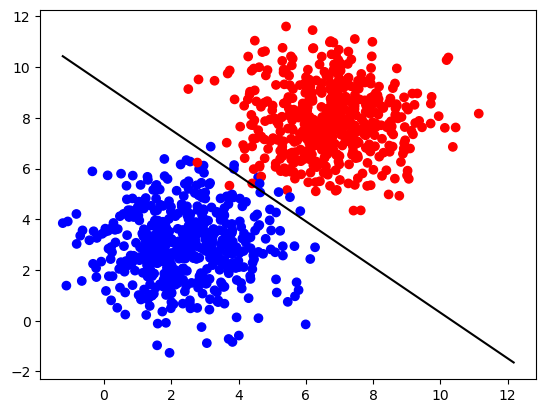

In [25]:
plot_decision_boundary(X_larger, Y_larger, parameters_larger)